# Info

* Data: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import sklearn

In [2]:
import os
from pathlib import Path

In [3]:
import seaborn as sns

# Import data

In [4]:
Path.cwd()

PosixPath('/home/sameervk/Documents/Training/MachineLearning/OpenDataScienceSandbox/QuantileRegression')

In [5]:
data_file = Path.cwd().parent.joinpath("datasets/kaggle/CAR DETAILS FROM CAR DEKHO.csv")

In [6]:
df = pd.read_csv(data_file)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


# Data exploration

In [8]:
# number of unique models
df['name'].nunique()

1491

#### NOTE
* Assuming 1491 models

## Box plots

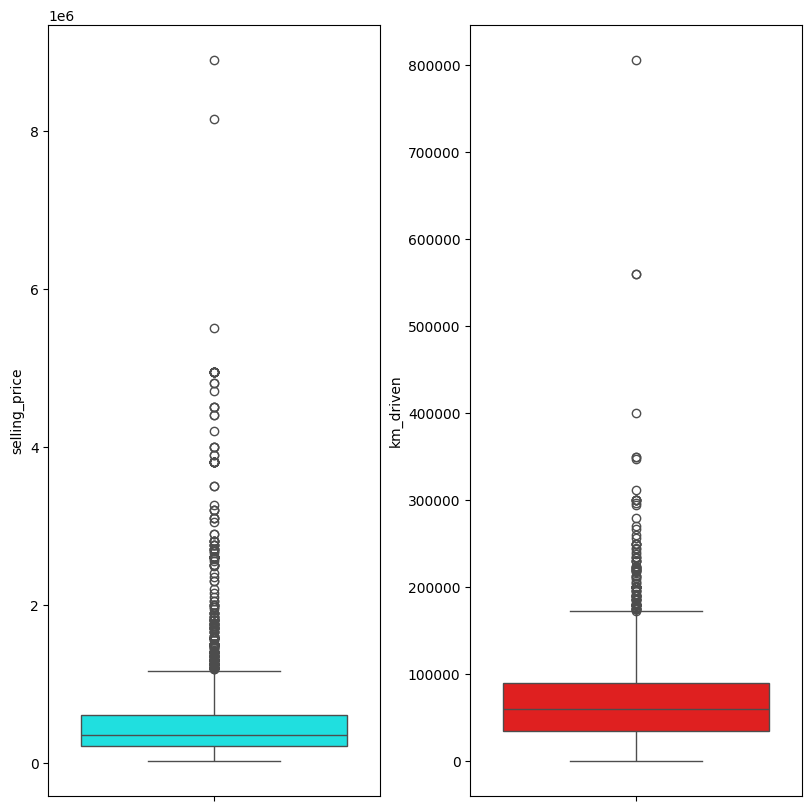

In [12]:
fig, ax = plt.subplots(1,2, figsize=(8,8), constrained_layout=True)
sns.boxplot(df['selling_price'], ax=ax[0], color = 'cyan')
sns.boxplot(df['km_driven'], ax=ax[1], color='red')
plt.show()

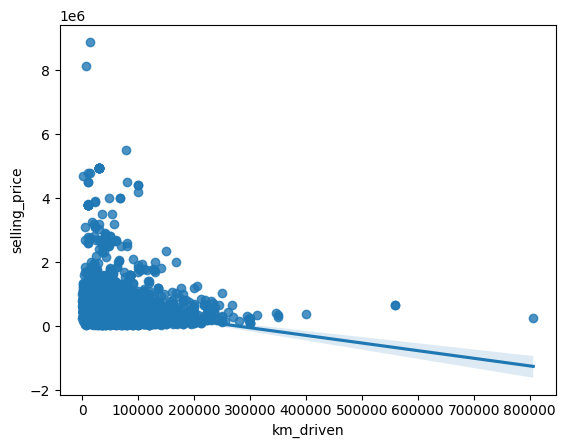

In [13]:
sns.regplot(x="km_driven", y="selling_price", data=df, y_jitter=10000)
plt.show()

## Pairplots

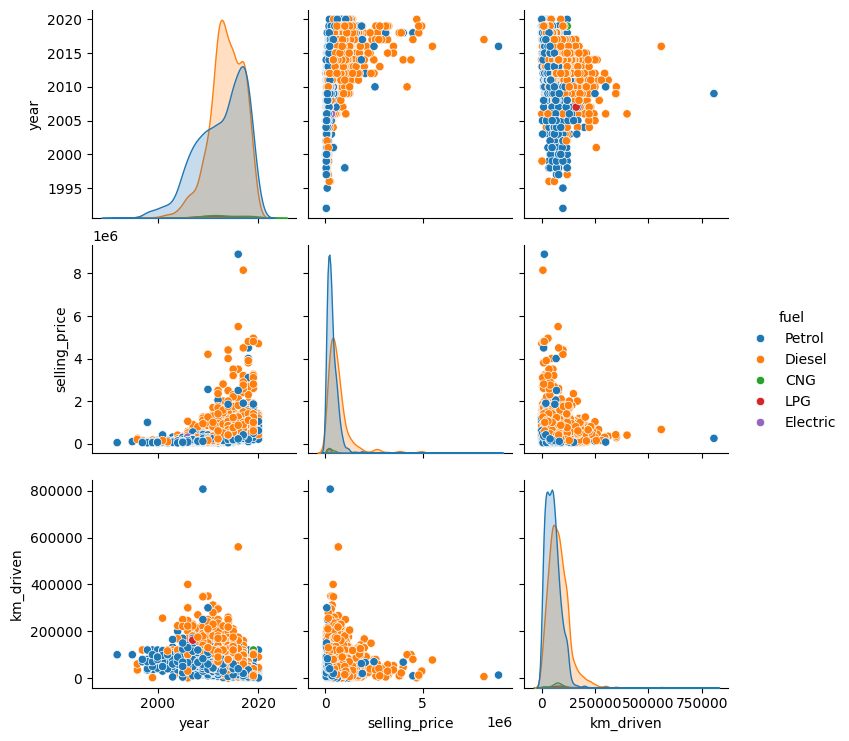

In [14]:
sns.pairplot(df, hue="fuel")
plt.show()

In [15]:
df['fuel'].value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

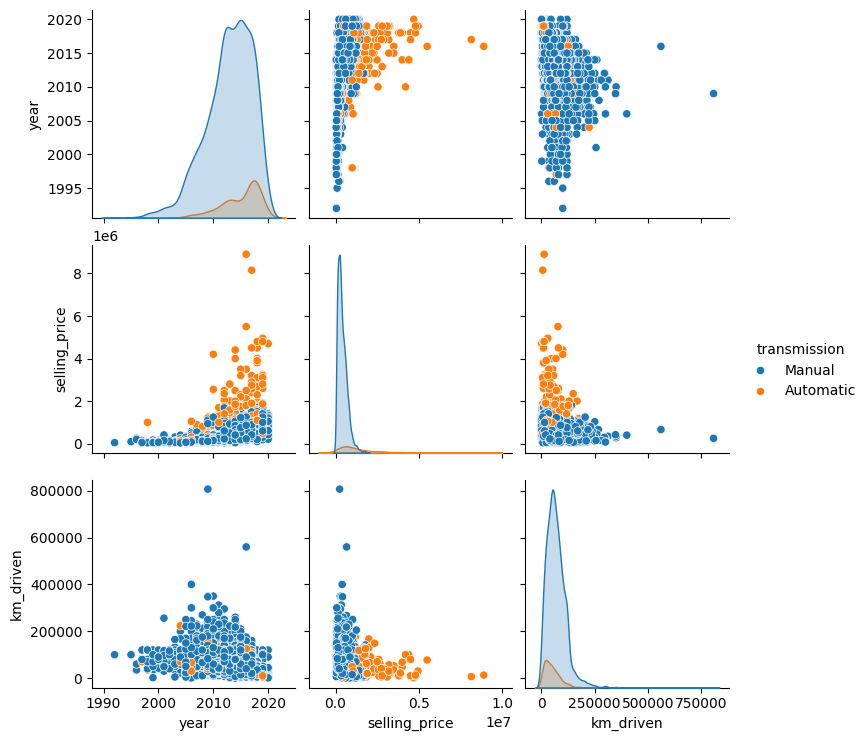

In [18]:
sns.pairplot(df, kind="scatter", diag_kind="kde", hue="transmission")
plt.show()

In [19]:
df['transmission'].value_counts()

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

## Additional column

In [20]:
# Adding the number of years old column
df['years_old'] = df.year.max() - df.year
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,years_old
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,6
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,6
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,11
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,4


* This doesn't affect the scatter plot

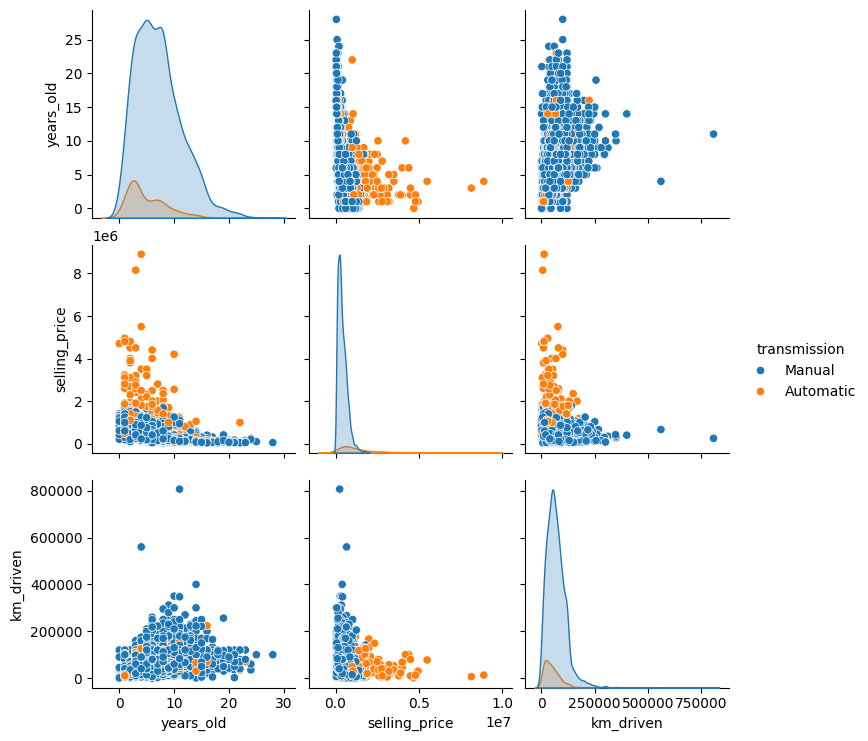

In [21]:
# checking
sns.pairplot(df,
             vars=["years_old", "selling_price", "km_driven"],              
             hue="transmission"
            )
plt.show()

## NOTE:

* Clearly there is a discriminating boundary between manual and automatic

# Clustering

## DROP

* use only petrol and diesel

In [23]:
df[df['fuel'].isin(["CNG", "LPG", "Electric"])]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,years_old
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner,3
22,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner,3
157,Maruti Wagon R DUO LPG,2014,210000,90000,LPG,Individual,Manual,First Owner,6
176,Maruti Alto K10 LXI CNG,2020,282000,40000,CNG,Individual,Manual,First Owner,0
222,Maruti Omni LPG CARGO BSIII W IMMOBILISER,2009,80000,90000,LPG,Individual,Manual,Second Owner,11
...,...,...,...,...,...,...,...,...,...
4063,Maruti Eeco 5 STR With AC Plus HTR CNG,2017,440000,14100,CNG,Dealer,Manual,First Owner,3
4076,Maruti Ertiga VXI CNG,2014,595000,56600,CNG,Dealer,Manual,First Owner,6
4140,Maruti Eeco 5 STR With AC Plus HTR CNG,2018,409999,45000,CNG,Individual,Manual,First Owner,2
4145,Toyota Camry Hybrid,2006,310000,62000,Electric,Dealer,Automatic,Second Owner,14


In [25]:
df[~df['fuel'].isin(["CNG", "LPG", "Electric"])]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,years_old
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,6
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,6
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,11
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,4


In [50]:
df_updated = df[~df['fuel'].isin(["CNG", "LPG", "Electric"])].copy()
df_updated.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,years_old
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner,13
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner,4
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner,6
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner,5
10,Chevrolet Sail 1.2 Base,2015,260000,35000,Petrol,Individual,Manual,First Owner,5


In [51]:
df_updated.reset_index(drop=True, inplace=True)

In [52]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4276 entries, 0 to 4275
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4276 non-null   object
 1   year           4276 non-null   int64 
 2   selling_price  4276 non-null   int64 
 3   km_driven      4276 non-null   int64 
 4   fuel           4276 non-null   object
 5   seller_type    4276 non-null   object
 6   transmission   4276 non-null   object
 7   owner          4276 non-null   object
 8   years_old      4276 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 300.8+ KB


In [29]:
len(df)

4340

In [30]:
df['fuel'].value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

## TRANSFORM

In [31]:
from sklearn.preprocessing import LabelEncoder

In [53]:
label_encoder_transmission = LabelEncoder()

In [54]:
df_updated['transmission'] = label_encoder_transmission.fit_transform(df_updated['transmission'])
df_updated['transmission'].value_counts()

transmission
1    3829
0     447
Name: count, dtype: int64

In [55]:
label_encoder_transmission.classes_

array(['Automatic', 'Manual'], dtype=object)

In [67]:
label_encoder_transmission.transform(label_encoder_transmission.classes_)

array([0, 1])

In [56]:
label_encoder_fuel = LabelEncoder()
df_updated['fuel'] = label_encoder_fuel.fit_transform(df_updated['fuel'])
df_updated['fuel'].value_counts()

fuel
0    2153
1    2123
Name: count, dtype: int64

In [57]:
label_encoder_fuel.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [58]:
label_encoder_fuel.transform(label_encoder_fuel.classes_)

array([0, 1])

# Correlation

In [61]:
df_updated.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'years_old'],
      dtype='object')

In [62]:
cols_of_interest = ["selling_price", "km_driven", "years_old"]

### Pearson

#### Manual + Automatic

In [63]:
df_corr = df_updated[cols_of_interest].corr(method='pearson')
df_corr

,selling_price,km_driven,years_old
selling_price,1.000000,-0.190798,-0.413692
km_driven,-0.190798,1.000000,0.419702
years_old,-0.413692,0.419702,1.000000


##### Heatmap

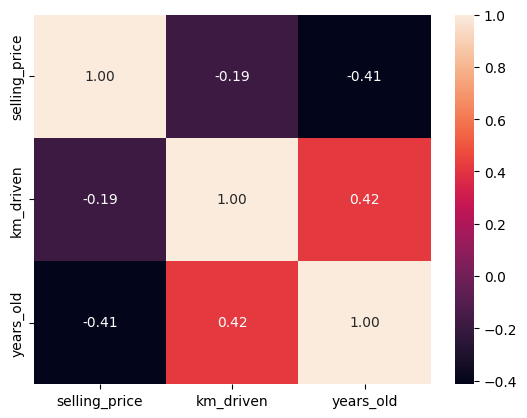

In [64]:
sns.heatmap(df_corr, annot=True, fmt='0.2f')
plt.show()

#### Manual

In [68]:
df_corr_m = df_updated[df_updated['transmission'] == 1][cols_of_interest].corr(method='pearson')
df_corr_m

,selling_price,km_driven,years_old
selling_price,1.000000,-0.221441,-0.623073
km_driven,-0.221441,1.000000,0.395307
years_old,-0.623073,0.395307,1.000000


##### Heatmap

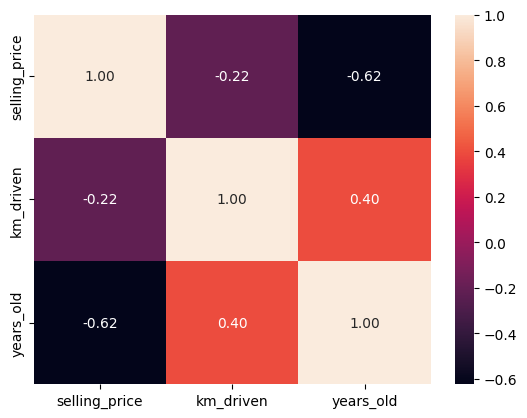

In [69]:
sns.heatmap(df_corr_m, annot=True, fmt='0.2f')
plt.show()

In [74]:
# Spearman correlation
df_corr_m_s = df_updated[df_updated['transmission'] == 1][cols_of_interest].corr(method='spearman')
df_corr_m_s

,selling_price,km_driven,years_old
selling_price,1.000000,-0.300273,-0.720896
km_driven,-0.300273,1.000000,0.539615
years_old,-0.720896,0.539615,1.000000


##### Heatmap

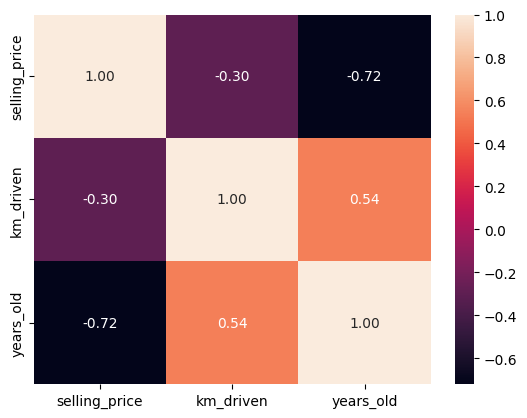

In [73]:
sns.heatmap(df_corr_m_s, annot=True, fmt='0.2f')
plt.show()

#### Automatic

In [70]:
df_corr_a = df_updated[df_updated['transmission'] == 0][cols_of_interest].corr(method='pearson')
df_corr_a

,selling_price,km_driven,years_old
selling_price,1.000000,-0.162049,-0.328115
km_driven,-0.162049,1.000000,0.587103
years_old,-0.328115,0.587103,1.000000


##### Heatmap

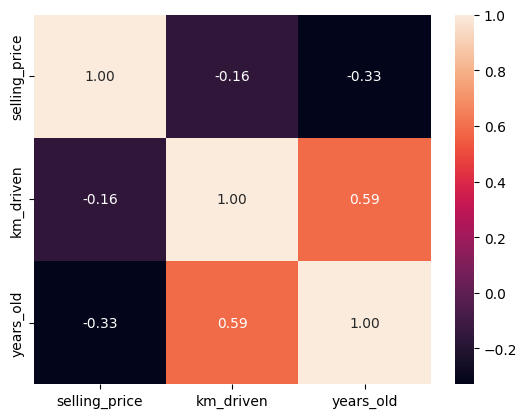

In [71]:
sns.heatmap(df_corr_a, annot=True, fmt='0.2f')
plt.show()

In [75]:
# Spearman correlation
df_corr_a_s = df_updated[df_updated['transmission'] == 0][cols_of_interest].corr(method='spearman')
df_corr_a_s

,selling_price,km_driven,years_old
selling_price,1.000000,-0.106316,-0.337514
km_driven,-0.106316,1.000000,0.714093
years_old,-0.337514,0.714093,1.000000


##### Heatmap

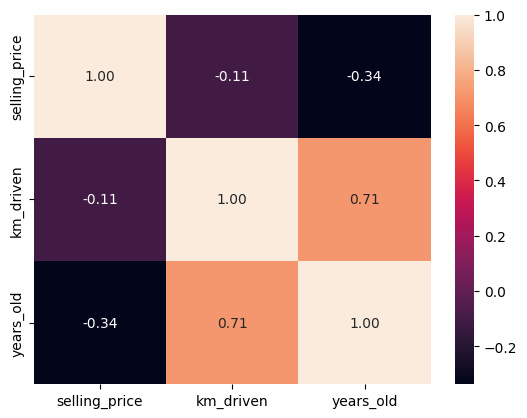

In [76]:
sns.heatmap(df_corr_a_s, annot=True, fmt='0.2f')
plt.show()

### Spearman

* It is a strength of monotonic relationship between the variables

## TODO:

1. Recap KDE
2. Correlation matrix
3. Spearman: how to calculate statistical significance of the coefficient?
4. Kendall Tau